<a href="https://colab.research.google.com/github/Undisputed-jay/Sentiment-Analysis-and-Text-Mining/blob/main/nlp_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>INTRODUCTION</h3>
<h5>NATURAL LANGUAGE PROCESSING</h5><br>
Natural language processing (NLP) is the process by which computers understand and process natural human language. If you use Google Search, Alex, Siri, or Google Assistant, you’ve already seen it at work.<br>
<br><strong>How does natural language processing work?</strong><br>
There are two main phases to natural language processing: data preprocessing and algorithm development.

Data preprocessing involves preparing and "cleaning" text data for machines to be able to analyze it. preprocessing puts data in workable form and highlights features in the text that an algorithm can work with. There are several ways this can be done, including:<ol>
    <li>Tokenization</li>
    <li>Stop word removal</li>
    <li>Lemmatization and stemming</li>
    <li>Part-of-speech tagging</li>
<img src = "NLP-768x356.png">

<h5>PRROBLEM STATEMENT</h5><br>
<img src = "text mining.PNG"></img>

In [ ]:
## Python Libraries

import numpy as np #For numerical Analysis
import pandas as pd ## For data Wrangling and Analysis
import nltk ## nltk libraries for text mining
import seaborn as sns #For data visualization
import matplotlib.pyplot as plt #For data visualization

#%matplotlib inline #enables the drawing of matplotlib figures in the IPython environment
import warnings
warnings.filterwarnings('ignore')

In [ ]:
## Importing NLTK Directory

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [ ]:
## Importing tourist dataset

dataset = pd.read_csv('tourist_accommodation_reviews (1).csv', header = 0, encoding = 'unicode_escape')
dataset.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [ ]:
## Checking Datatypes

dataset.dtypes

ID                       object
Review Date              object
Location                 object
Hotel/Restaurant name    object
Review                   object
dtype: object

In [ ]:
## Statistical Analysis of the Datatset

dataset.describe()

,ID,Review Date,Location,Hotel/Restaurant name,Review
count,53644,53644,53644,53644,53644
unique,49944,2344,25,537,49938
top,rn564592095,Reviewed 1 week ago,Patong,Da Mario,I have been to this restaurant several times f...
freq,10,616,16403,279,10


<h3>EXPLORATORY DATA ANALYSIS </h3>

In [ ]:
len(dataset['Hotel/Restaurant name'].unique())

537

In [ ]:
## Renaming the Review Date Column

dataset.rename(columns = {'Review Date' : 'Review_Date'}, inplace = True)

In [ ]:
## CHecking the number of locations

dataset['Location'].unique()

array([' Kathu', ' Kata Beach', ' Rawai', ' Choeng Thale', ' Karon Beach',
       ' Phuket Town', ' Patong', ' Mai Khao', ' Karon', ' Chalong',
       ' Nai Harn', ' Cape Panwa', ' Sakhu', ' Pa Khlok', ' Kamala',
       ' Bang Tao Beach', ' Thalang District', ' Talat Nuea',
       ' Kata Noi Beach', ' Wichit', ' Nai Yang', ' Talat Yai',
       ' Koh Kaew', ' Nai Thon', ' Ratsada'], dtype=object)

In [ ]:
## Removing whitespaces in the Location

dataset['Location'] = dataset['Location'].apply(lambda x: x.lstrip(' '))

In [ ]:
dataset.isna().sum()

ID                       0
Review_Date              0
Location                 0
Hotel/Restaurant name    0
Review                   0
dtype: int64

In [ ]:
## Number of locations

len(dataset['Location'].unique())

25

In [ ]:
## Checking the List of Hotels in the Dataset

dataset['Hotel/Restaurant name'].unique()

array(['Thong Dee The Kathu Brasserie',
       'Odysseus Greek Organic Restaurant', 'Green Tamarind Kitchen',
       'Dee Plee - Anantara Layan Phuket Resort', 'The Tavern',
       'EAT. bar & grill', 'Surf and Turf by Soul Kitchen',
       'Siam Supper Club', "Sam's Steaks and Grill",
       'Istanbul Turkish Restaurant', 'The Corner Restaurant',
       'Kataturk Turkish Restaurant', 'Sala Sawasdee Lobby Bar',
       'The Palm Cuisine', 'Highway Curry Indian & Thai Cuisine',
       'Tandoori Flames', 'Pad Thai Shop', 'Golden Paradise Restaurant',
       'Mr.Coffee', 'Flavor Phuket', 'Baan Noy Restaurant',
       'Ao Chalong Yacht Club Restaurant', "Naughty Nuri's Phuket",
       'Surin Chill House', 'Natural Efe Macrobiotic World',
       'Honeymoon Thai Restaurant by Kenya', 'O-OH Farm Ta-Eiad',
       'Da Puccio Restaurant', 'Sizzle Rooftop Restaurant',
       "Benny's American Bar & Grill", 'Climax on Bangla',
       'Le Brooklyn Patong', 'La Dolce Vita Restaurant', 'Sabaijai Cafe'

In [ ]:
## Checking the City with the Most Hotels

dataset['Location'].value_counts()

Patong              16403
Karon                5826
Kata Beach           5752
Rawai                3811
Choeng Thale         3378
Phuket Town          3356
Kamala               3162
Mai Khao             2372
Cape Panwa           1500
Chalong              1287
Thalang District     1177
Kathu                1078
Nai Yang              996
Nai Harn              881
Bang Tao Beach        600
Karon Beach           397
Wichit                395
Talat Yai             300
Koh Kaew              293
Kata Noi Beach        200
Pa Khlok              100
Ratsada                98
Talat Nuea             97
Nai Thon               94
Sakhu                  91
Name: Location, dtype: int64

<strong>Observation<br>
Patong City has the most Hotel Location

In [ ]:
data = dataset.loc[dataset['Location'] == 'Patong']
data

,ID,Review_Date,Location,Hotel/Restaurant name,Review
793,rn578272599,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,its very expensive in comparison to other loca...
794,rn576707124,Reviewed 2 weeks ago,Patong,Sam's Steaks and Grill,We walked passed the holiday inn and decided a...
795,rn576151146,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,"An atmosphere of the 70's, great comfort of th..."
796,rn575977118,Reviewed 3 weeks ago,Patong,Sam's Steaks and Grill,We made a reservation at the last minute to di...
797,rn574931000,Reviewed 4 weeks ago,Patong,Sam's Steaks and Grill,We had a very great time to celebrate my son b...
...,...,...,...,...,...
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."


In [ ]:
len(data['Hotel/Restaurant name'].unique())

164

In [ ]:
data['Hotel/Restaurant name'].value_counts()

No.6 Restaurant                                      200
Da Mario                                             187
Spoon Cafe                                           100
99 Seafood                                           100
Baan Rim Pa Patong                                   100
                                                    ... 
Ristorante Pizzeria Zafferano                         92
Austrian Garden Restaurant                            92
La Capannina da Mario                                 91
Sultan's Grill Authentic Turkish & Indian Cuisine     91
Chez Nicolas                                          90
Name: Hotel/Restaurant name, Length: 164, dtype: int64

In [ ]:
df1 = data.loc[data['Hotel/Restaurant name'] == 'Irish Times Pub']
df2 = data.loc[data['Hotel/Restaurant name'] == 'La Casa']
df3 = data.loc[data['Hotel/Restaurant name'] == 'No.6 Restaurant']
df4 = data.loc[data['Hotel/Restaurant name'] == '99 Seafood']
df5 = data.loc[data['Hotel/Restaurant name'] == 'Malila Restaurant']
df6 = data.loc[data['Hotel/Restaurant name'] == 'The Orchids Restaurant']
df7 = data.loc[data['Hotel/Restaurant name'] == 'Kohinoor 2']
df8 = data.loc[data['Hotel/Restaurant name'] == 'The Crab House']
df9 = data.loc[data['Hotel/Restaurant name'] == 'Sole Mio']
df10 = data.loc[data['Hotel/Restaurant name'] == 'Doo Dee']
df11 = data.loc[data['Hotel/Restaurant name'] == 'Chez Nicolas']
df12 = data.loc[data['Hotel/Restaurant name'] == 'Baluchi Restaurant']
df13 = data.loc[data['Hotel/Restaurant name'] == 'Spoon Cafe']
df14 = data.loc[data['Hotel/Restaurant name'] == 'The Sandwich Club']
df15 = data.loc[data['Hotel/Restaurant name'] == 'Ali Baba Restaurant']
df16 = data.loc[data['Hotel/Restaurant name'] == 'Jeffer']
df17 = data.loc[data['Hotel/Restaurant name'] == 'Savoey Restaurant']
df18 = data.loc[data['Hotel/Restaurant name'] == 'Coyote']
df19 = data.loc[data['Hotel/Restaurant name'] == 'Green Mango']
df20 = data.loc[data['Hotel/Restaurant name'] == 'Spice House']
df21 = data.loc[data['Hotel/Restaurant name'] == 'Il Cappero']
df22 = data.loc[data['Hotel/Restaurant name'] == 'Sabai Beach']
df23 = data.loc[data['Hotel/Restaurant name'] == 'P.S. Hotel']
df24 = data.loc[data['Hotel/Restaurant name'] == "Molly's Tavern"]
df25 = data.loc[data['Hotel/Restaurant name'] == 'Da Mario']
df26 = data.loc[data['Hotel/Restaurant name'] == 'No 9 Restaurant']
df27 = data.loc[data['Hotel/Restaurant name'] == 'i-Kroon Cafe']
df28 = data.loc[data['Hotel/Restaurant name'] == 'Salsa Mexicana']
df29 = data.loc[data['Hotel/Restaurant name'] == 'La Gritta']
df30 = data.loc[data['Hotel/Restaurant name'] == 'Ken Restaurant']

In [ ]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24, df25, df26, df27, df28, df29, df30]

In [ ]:
new_data = pd.concat(frames)
new_data

,ID,Review_Date,Location,Hotel/Restaurant name,Review
34684,rn581229219,Reviewed yesterday,Patong,Irish Times Pub,Came here today with my family.\r\nGreat ambie...
34685,rn581135143,Reviewed 2 days ago,Patong,Irish Times Pub,Irish Times Pub has some great western style f...
34686,rn580738420,Reviewed 4 days ago,Patong,Irish Times Pub,Have been there 3 times. Each time was terrifi...
34687,rn580735494,Reviewed 4 days ago,Patong,Irish Times Pub,Went there twice in 2 weeks.\r\nFirst time i h...
34688,rn580314528,Reviewed 5 days ago,Patong,Irish Times Pub,"Great value, all you can eat Sunday roast with..."
...,...,...,...,...,...
44467,rn579384422,Reviewed 1 week ago,Patong,Ken Restaurant,Conviently close to our stay and to the beach....
44468,rn576624666,Reviewed 3 weeks ago,Patong,Ken Restaurant,"Friendly service, meals ok. We ate here as we ..."
44469,rn576333384,Reviewed 3 weeks ago,Patong,Ken Restaurant,The younger female staff slammed the pages in ...
44470,rn570995596,"Reviewed April 4, 2018",Patong,Ken Restaurant,"This restaurant is a short walk to our resort,..."


In [ ]:
## List of Hotels in Patong City

new_data['Hotel/Restaurant name'].unique()

array(['Irish Times Pub', 'La Casa', 'No.6 Restaurant', '99 Seafood',
       'Malila Restaurant', 'The Orchids Restaurant', 'Kohinoor 2',
       'The Crab House', 'Sole Mio', 'Doo Dee', 'Chez Nicolas',
       'Baluchi Restaurant', 'Spoon Cafe', 'The Sandwich Club',
       'Ali Baba Restaurant', 'Jeffer', 'Savoey Restaurant', 'Coyote',
       'Green Mango', 'Spice House', 'Il Cappero', 'Sabai Beach',
       'P.S. Hotel', "Molly's Tavern", 'Da Mario', 'No 9 Restaurant',
       'i-Kroon Cafe', 'Salsa Mexicana', 'La Gritta', 'Ken Restaurant'],
      dtype=object)

In [ ]:
## Number of Hotels 

len(new_data['Hotel/Restaurant name'].unique())

30

In [ ]:
new_data['Hotel/Restaurant name'].value_counts()

No.6 Restaurant           200
Da Mario                  187
Irish Times Pub           100
No 9 Restaurant           100
Coyote                    100
Savoey Restaurant         100
Ali Baba Restaurant       100
The Sandwich Club         100
Spoon Cafe                100
Baluchi Restaurant        100
i-Kroon Cafe              100
P.S. Hotel                100
La Gritta                 100
The Crab House            100
Kohinoor 2                100
The Orchids Restaurant    100
Malila Restaurant         100
99 Seafood                100
Molly's Tavern            100
Jeffer                     96
Green Mango                96
La Casa                    96
Spice House                95
Sole Mio                   95
Il Cappero                 94
Sabai Beach                94
Doo Dee                    94
Salsa Mexicana             94
Ken Restaurant             94
Chez Nicolas               90
Name: Hotel/Restaurant name, dtype: int64

In [ ]:
#Import the sentiment Intensity Analyser

from nltk.sentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

In [ ]:
## Using the instantiated SentimentIntensityAnalyzer to generate polarity scores for the Reviews

new_data['compound'] = [sentiment.polarity_scores(review)['compound'] for review in new_data['Review']]
new_data['neg'] = [sentiment.polarity_scores(review)['neg'] for review in new_data['Review']]
new_data['neu'] = [sentiment.polarity_scores(review)['neu'] for review in new_data['Review']]
new_data['pos'] = [sentiment.polarity_scores(review)['pos'] for review in new_data['Review']]

new_data

,ID,Review_Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos
34684,rn581229219,Reviewed yesterday,Patong,Irish Times Pub,Came here today with my family.\r\nGreat ambie...,0.9441,0.000,0.693,0.307
34685,rn581135143,Reviewed 2 days ago,Patong,Irish Times Pub,Irish Times Pub has some great western style f...,0.7958,0.040,0.745,0.216
34686,rn580738420,Reviewed 4 days ago,Patong,Irish Times Pub,Have been there 3 times. Each time was terrifi...,0.9313,0.000,0.742,0.258
34687,rn580735494,Reviewed 4 days ago,Patong,Irish Times Pub,Went there twice in 2 weeks.\r\nFirst time i h...,0.8271,0.000,0.814,0.186
34688,rn580314528,Reviewed 5 days ago,Patong,Irish Times Pub,"Great value, all you can eat Sunday roast with...",0.8885,0.000,0.781,0.219
...,...,...,...,...,...,...,...,...,...
44467,rn579384422,Reviewed 1 week ago,Patong,Ken Restaurant,Conviently close to our stay and to the beach....,0.8469,0.000,0.632,0.368
44468,rn576624666,Reviewed 3 weeks ago,Patong,Ken Restaurant,"Friendly service, meals ok. We ate here as we ...",0.4215,0.113,0.625,0.262
44469,rn576333384,Reviewed 3 weeks ago,Patong,Ken Restaurant,The younger female staff slammed the pages in ...,-0.5095,0.076,0.924,0.000
44470,rn570995596,"Reviewed April 4, 2018",Patong,Ken Restaurant,"This restaurant is a short walk to our resort,...",0.2732,0.000,0.952,0.048


In [ ]:
new_data[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,3125.000000,3125.000000,3125.00000,3125.000000
mean,0.564546,0.035951,0.74939,0.214666
std,0.502579,0.062261,0.12724,0.139660
min,-0.964200,0.000000,0.23700,0.000000
25%,0.438000,0.000000,0.66700,0.103000
50%,0.800000,0.000000,0.75600,0.203000
75%,0.914500,0.056000,0.84100,0.307000
max,0.990300,0.468000,1.00000,0.714000


In [ ]:
a = new_data['neg'].min()
b = new_data['neg'].max()
c = new_data['pos'].min()
d = new_data['pos'].max()

print('--------------------------------')
print('NEGATIVE MINIMUM VALUE')
print(a)
print('--------------------------------')
print('NEGATIVE MAXIMUM VALUE')
print(b)
print('--------------------------------')
print('POSITIVE MINIMUM VALUE')
print(c)
print('--------------------------------')
print('POSITIVE MAXIMUM VALUE')
print(d)

--------------------------------
NEGATIVE MINIMUM VALUE
0.0
--------------------------------
NEGATIVE MAXIMUM VALUE
0.468
--------------------------------
POSITIVE MINIMUM VALUE
0.0
--------------------------------
POSITIVE MAXIMUM VALUE
0.714


<AxesSubplot:xlabel='compound', ylabel='Count'>

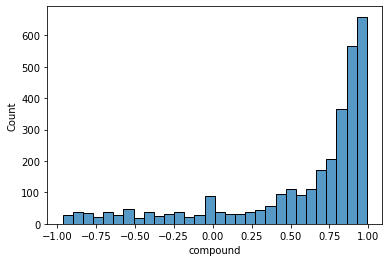

In [ ]:
sns.histplot(data = new_data['compound'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

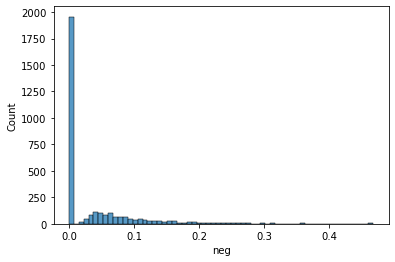

In [ ]:
sns.histplot(data = new_data['neg'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

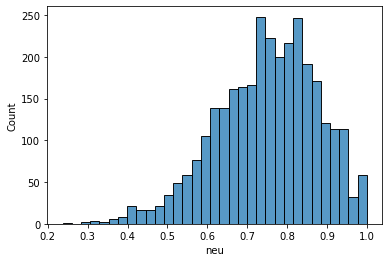

In [ ]:
sns.histplot(data = new_data['neu'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

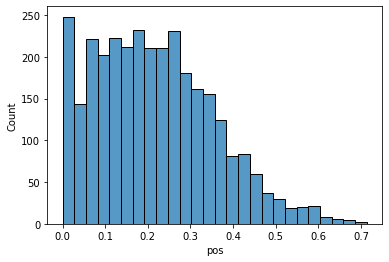

In [ ]:
sns.histplot(data = new_data['pos'])

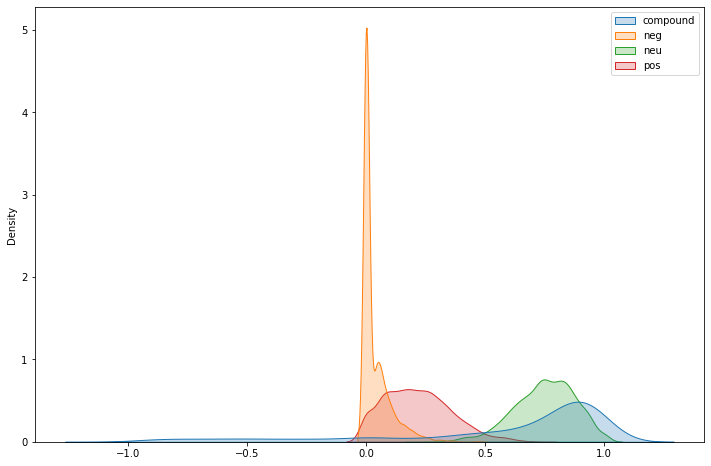

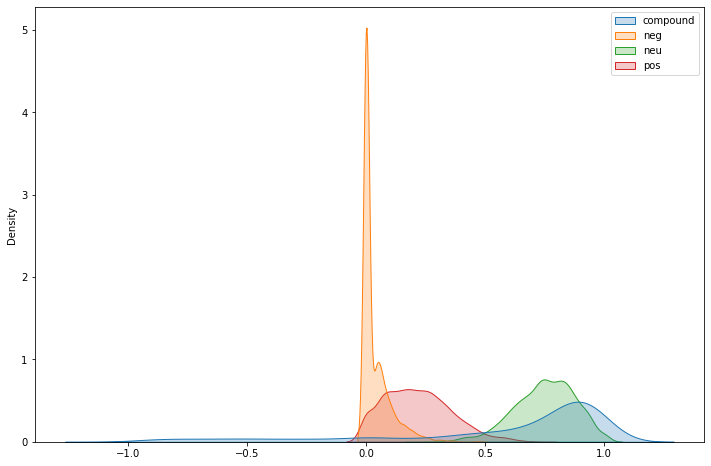

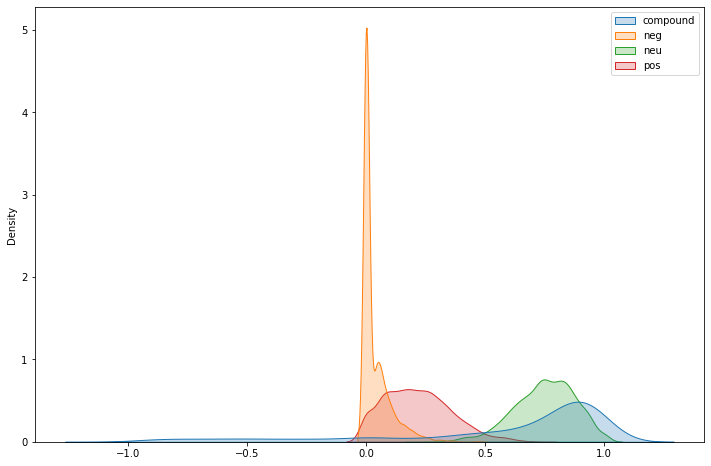

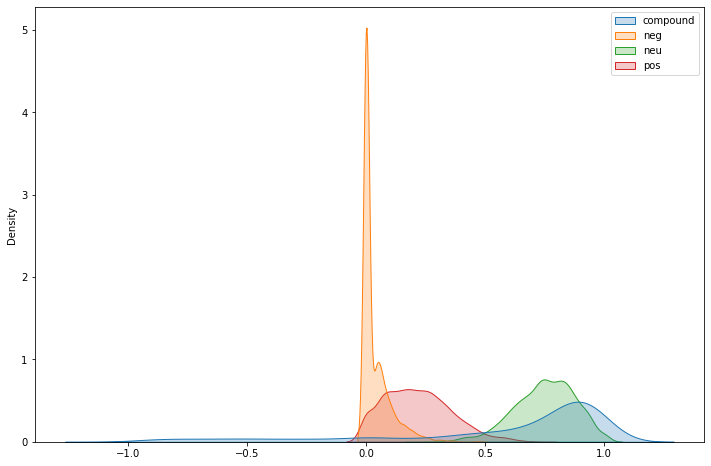

In [ ]:
columns = ['compound', 'neg,', 'pos', 'neu']
for i in columns:
    plt.figure(figsize = (12, 8))
    sns.kdeplot(data = new_data, shade = True)

In [ ]:
## Getting the numbers of negative review per Hotel

(new_data['compound'] <= 0).groupby(new_data['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
99 Seafood                23
Ali Baba Restaurant       37
Baluchi Restaurant        11
Chez Nicolas              30
Coyote                     9
Da Mario                  35
Doo Dee                   19
Green Mango                8
Il Cappero                 6
Irish Times Pub           13
Jeffer                    28
Ken Restaurant             9
Kohinoor 2                20
La Casa                   44
La Gritta                  8
Malila Restaurant         23
Molly's Tavern            21
No 9 Restaurant            9
No.6 Restaurant           18
P.S. Hotel                12
Sabai Beach               11
Salsa Mexicana             4
Savoey Restaurant         22
Sole Mio                  12
Spice House               20
Spoon Cafe                27
The Crab House            13
The Orchids Restaurant     7
The Sandwich Club          8
i-Kroon Cafe               5
Name: compound, dtype: int64

In [ ]:
## Calculating the percent numbers of negative review

per_neg = pd.DataFrame((new_data['compound'] <= 0).groupby(new_data['Hotel/Restaurant name']).sum()
                      / new_data['Hotel/Restaurant name'].groupby(new_data['Hotel/Restaurant name']).count(),
                      columns = ['% negative reviews']).sort_values(by = '% negative reviews')

per_neg

,% negative reviews
Hotel/Restaurant name,
Salsa Mexicana,0.042553
i-Kroon Cafe,0.050000
Il Cappero,0.063830
The Orchids Restaurant,0.070000
The Sandwich Club,0.080000
La Gritta,0.080000
Green Mango,0.083333
No 9 Restaurant,0.090000
Coyote,0.090000


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

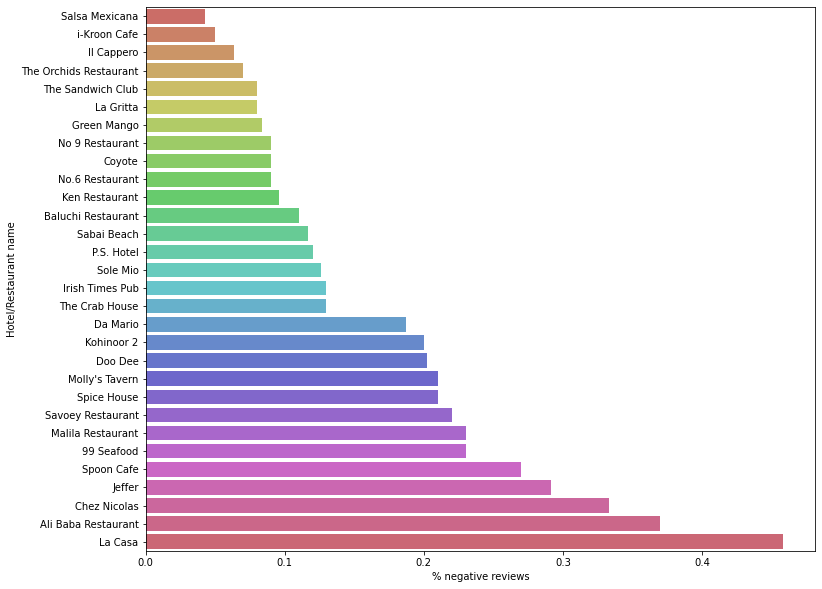

In [ ]:
## Plotting the result of negative review as an horizontal barplot using seaborn

plt.figure(figsize = (12, 10))
sns.barplot(data = per_neg, x = '% negative reviews', y = per_neg.index, color = 'violet', palette = 'hls')

In [ ]:
## Checking the Hotel that has the most reviews

new_data['Hotel/Restaurant name'].value_counts()

No.6 Restaurant           200
Da Mario                  187
Irish Times Pub           100
No 9 Restaurant           100
Coyote                    100
Savoey Restaurant         100
Ali Baba Restaurant       100
The Sandwich Club         100
Spoon Cafe                100
Baluchi Restaurant        100
i-Kroon Cafe              100
P.S. Hotel                100
La Gritta                 100
The Crab House            100
Kohinoor 2                100
The Orchids Restaurant    100
Malila Restaurant         100
99 Seafood                100
Molly's Tavern            100
Jeffer                     96
Green Mango                96
La Casa                    96
Spice House                95
Sole Mio                   95
Il Cappero                 94
Sabai Beach                94
Doo Dee                    94
Salsa Mexicana             94
Ken Restaurant             94
Chez Nicolas               90
Name: Hotel/Restaurant name, dtype: int64

<strong>Observation<br>
No.6 Restaurant has the most review with 200 review, followed by Da Mario with 187 reviews.

In [ ]:
## Getting a list of english stopwords

stopword = nltk.corpus.stopwords.words('english')
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
## Defining a function for tokenizing and stemming
## Tokenization is the first step and it involves breaking words into smaller units so as to be readable by the compiler


def preprocess(text):
    tokens = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cleaned_tokens = [word.lower() for word in tokens if word.lower() not in stopword]
    stemmer = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmer

In [ ]:
#Calling the preprocess function and creating a new column 'preprocessed review'

new_data['processed review'] = new_data['Review'].apply(preprocess)
new_data['processed review']

34684    [came, today, famili, great, ambienc, realli, ...
34685    [irish, time, pub, great, western, style, food...
34686    [3, time, time, terrif, chicken, parma, pad, t...
34687    [went, twice, 2, week, first, time, lamb, shan...
34688    [great, valu, eat, sunday, roast, lamb, beef, ...
                               ...                        
44467    [convient, close, stay, beach, great, food, go...
44468    [friendli, servic, meal, ok, ate, tire, want, ...
44469    [younger, femal, staff, slam, page, menu, fron...
44470    [restaur, short, walk, resort, thought, we'd, ...
44471    [we'v, place, march, food, delici, good, size,...
Name: processed review, Length: 3125, dtype: object

In [ ]:
## Since No.6 Restaurant has the most reviews, checking the list of all positive subset for No.6 Restaurant    

positive_subset = new_data.loc[(new_data['Hotel/Restaurant name'] == 'No.6 Restaurant') 
                                      & (new_data['compound'] > 0), :]
positive_subset

,ID,Review_Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed review
22800,rn580747873,Reviewed 4 days ago,Patong,No.6 Restaurant,We were intrigued be the amount of people out ...,0.5574,0.000,0.923,0.077,"[intrigu, amount, peopl, front, line, time, da..."
22802,rn579344086,Reviewed 1 week ago,Patong,No.6 Restaurant,The restaurant in town was packed with a line ...,0.7609,0.044,0.783,0.172,"[restaur, town, pack, line, door, jump, courte..."
22803,rn578922463,Reviewed 1 week ago,Patong,No.6 Restaurant,A lot of good reviews for this place made us t...,0.6249,0.000,0.887,0.113,"[lot, good, review, place, made, us, tri, seco..."
22804,rn578423377,Reviewed 2 weeks ago,Patong,No.6 Restaurant,All of foods are delicious and value for money...,0.9011,0.044,0.688,0.268,"[food, delici, valu, money, noral, hate, wait,..."
22805,rn572077758,"Reviewed April 9, 2018",Patong,No.6 Restaurant,We accidentally saw No.6 restaurant on our way...,0.6369,0.049,0.816,0.135,"[accident, saw, 6, restaur, way, hotel, saw, l..."
...,...,...,...,...,...,...,...,...,...,...
24583,rn552676176,"Reviewed January 9, 2018",Patong,No.6 Restaurant,One of the best for Thai food with quick servi...,0.9062,0.040,0.686,0.274,"[one, best, thai, food, quick, servic, excel, ..."
24584,rn552643377,"Reviewed January 8, 2018",Patong,No.6 Restaurant,Delicious food. Probably one of the the best i...,0.9118,0.000,0.674,0.326,"[delici, food, probabl, one, best, patong, ama..."
24585,rn552217154,"Reviewed January 7, 2018",Patong,No.6 Restaurant,Great service friendly staff and amazing fresh...,0.9466,0.000,0.423,0.577,"[great, servic, friendli, staff, amaz, fresh, ..."
24586,rn552191189,"Reviewed January 7, 2018",Patong,No.6 Restaurant,We loved this restaurant up the hill. We took ...,0.9112,0.000,0.780,0.220,"[love, restaur, hill, took, free, transport, h..."


In [ ]:
## Since No.6 Restaurant has the most reviews, checking the list of all negative subset for No.6 Restaurant    

negative_subset = new_data.loc[(new_data['Hotel/Restaurant name'] == 'No.6 Restaurant') 
                                      & (new_data['compound'] <= 0), :]
negative_subset.head()

,ID,Review_Date,Location,Hotel/Restaurant name,Review,compound,neg,neu,pos,processed review
22801,rn579802333,Reviewed 1 week ago,Patong,No.6 Restaurant,"damm, the fried prawn cake made a debut in my ...",-0.6124,0.161,0.839,0.000,"[damm, fri, prawn, cake, made, debut, heart, c..."
22806,rn572068488,"Reviewed April 8, 2018",Patong,No.6 Restaurant,This could have been a enjoyable evening but f...,-0.3818,0.078,0.879,0.043,"[could, enjoy, even, restaurannt, reckless, dr..."
22823,rn558052291,"Reviewed February 3, 2018",Patong,No.6 Restaurant,We went at 16:00 and it was packed solid. At 1...,-0.0817,0.108,0.770,0.121,"[went, 16, 00, pack, solid, 17, 00, peopl, lin..."
22834,rn549910109,"Reviewed December 29, 2017",Patong,No.6 Restaurant,"We stopped here for lunch today, despite being...",-0.0772,0.091,0.846,0.062,"[stop, lunch, today, despit, busi, manag, seat..."
22835,rn548819831,"Reviewed December 23, 2017",Patong,No.6 Restaurant,"Ordered shrimp fried rice, shrimp tomyum gong ...",0.0000,0.000,1.000,0.000,"[order, shrimp, fri, rice, shrimp, tomyum, gon..."


In [ ]:
negative_subset.shape

(18, 10)

<h6>WordCloud</h6>

In [ ]:
## Using Wordcloud to visualize our data
## Creating wordcloud of negative reviews for No.6 Restaurant

from wordcloud import WordCloud
neg_token = [word for review in negative_subset['processed review'] for word in review]
wc_neg = WordCloud(background_color = 'grey', 
                   colormap = 'magma', 
                   width = 800, height = 400, 
                   random_state = 1,
                  collocations = False,
                  min_font_size = 10).generate_from_text(' '.join(neg_token))

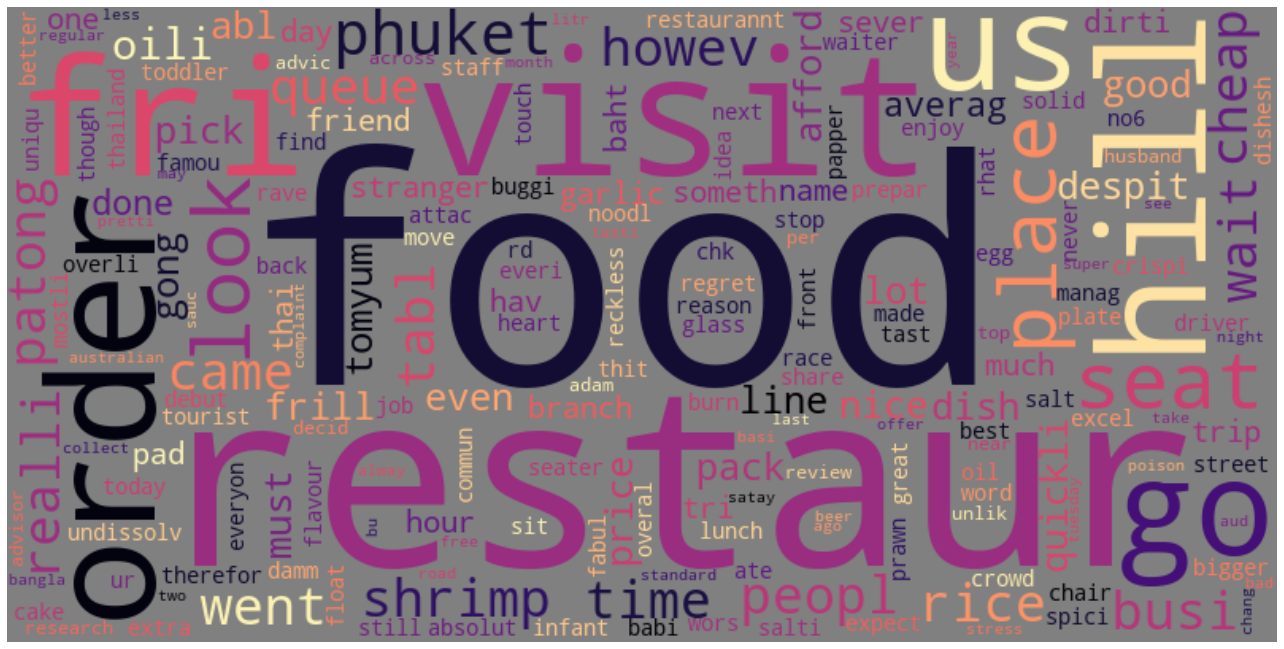

In [ ]:
## Visualizing the Negative Wordcloud

plt.figure(figsize = (18, 15))
plt.imshow(wc_neg, interpolation = 'bilinear', cmap = 'viridis')
plt.tight_layout(pad = 0)
plt.axis('off')
plt.show()

In [ ]:
print(neg_token)

['damm', 'fri', 'prawn', 'cake', 'made', 'debut', 'heart', 'crispi', 'overli', 'oili', 'despit', 'fri', 'dish', 'must', 'order', 'regret', 'price', 'afford', 'could', 'enjoy', 'even', 'restaurannt', 'reckless', 'driver', 'pick', 'us', 'front', 'no6', 'rhat', 'thit', 'rd', 'word', 'go', 'race', 'time', 'pick', 'next', 'lot', 'tourist', 'went', '16', '00', 'pack', 'solid', '17', '00', 'peopl', 'line', 'street', 'therefor', 'prepar', 'wait', 'commun', 'seat', 'staff', 'nice', 'babi', 'seat', 'good', 'infant', 'toddler', 'food', 'reason', 'stop', 'lunch', 'today', 'despit', 'busi', 'manag', 'seat', 'us', 'quickli', 'even', 'buggi', 'bigger', 'tabl', 'came', 'back', 'move', 'nice', 'touch', 'frill', 'expect', 'order', 'shrimp', 'fri', 'rice', 'shrimp', 'tomyum', 'gong', 'fri', 'glass', 'noodl', 'fri', 'rice', 'salti', 'still', 'abl', 'tast', 'undissolv', 'salt', 'tomyum', 'gong', 'realli', 'averag', 'spici', 'howev', 'shrimp', 'everi', 'plate', 'busi', 'restaur', 'waiter', 'get', 'job', 'do

In [ ]:
len(neg_token)

377

In [ ]:
## Creating wordcloud of postive reviews for No.6 Restaurant

from wordcloud import WordCloud
pos_token = [word for review in positive_subset['processed review'] for word in review]
wc_pos = WordCloud(background_color = 'navy', 
                   colormap = 'rainbow', 
                   width = 800, height = 400, 
                   random_state = 1,
                  collocations = False,
                  min_font_size = 10).generate_from_text(' '.join(pos_token))

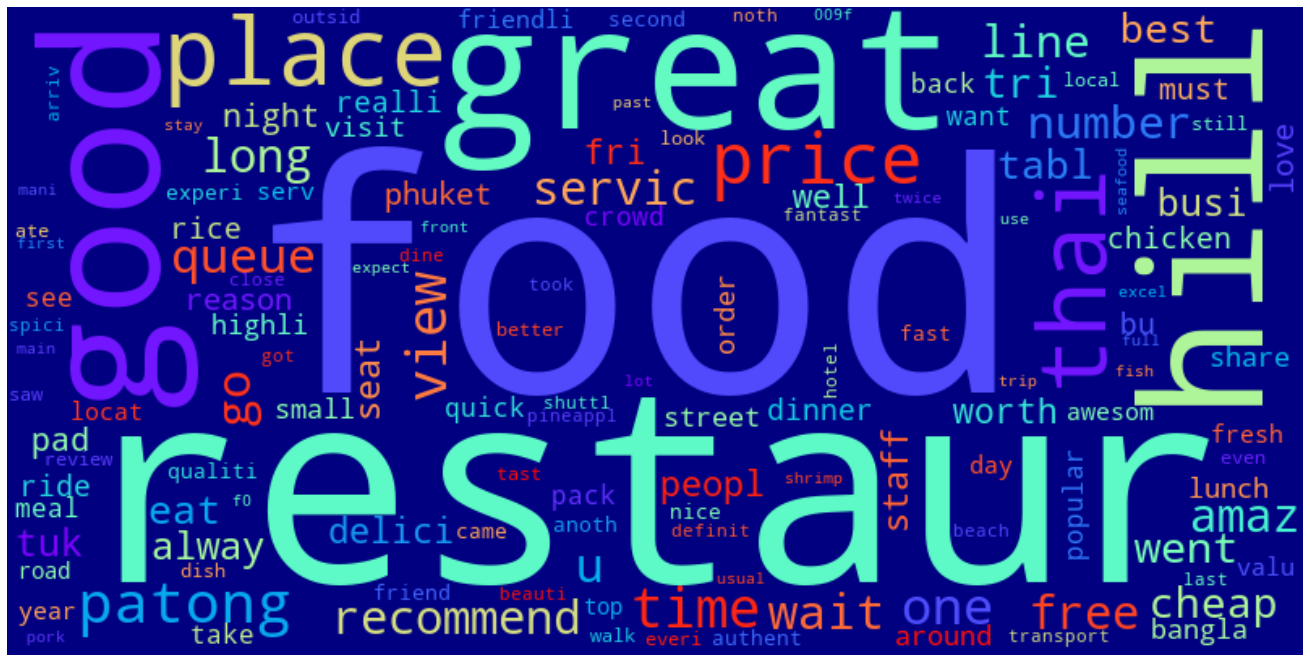

In [ ]:
## Visualizing the Positive Wordcloud

plt.figure(figsize = (18, 15))
plt.imshow(wc_pos, interpolation = 'bilinear', cmap = 'viridis')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
print(pos_token)

['intrigu', 'amount', 'peopl', 'front', 'line', 'time', 'day', 'thought', 'give', 'go', 'food', 'fantast', 'must', 'tri', 'bbq', 'pork', 'neck', 'dip', 'sauc', 'amaz', 'restaur', 'town', 'pack', 'line', 'door', 'jump', 'courtesi', 'bu', 'went', 'second', 'restaur', 'hill', 'pack', 'great', 'view', 'patong', 'food', 'ok', 'noth', 'special', 'anoth', 'lot', 'good', 'review', 'place', 'made', 'us', 'tri', 'second', 'time', 'place', 'busi', 'expect', 'wait', 'least', '10', '15', 'minut', 'seat', 'tabl', 'share', 'diner', 'clam', 'food', 'delici', 'valu', 'money', 'noral', 'hate', 'wait', 'seat', 'around', '15', '20', 'min', 'one', 'valu', 'mani', 'number', '6', 'restaur', 'around', 'ptong', 'one', 'best', 'bewar', 'tom', 'yum', 'accident', 'saw', '6', 'restaur', 'way', 'hotel', 'saw', 'long', 'line', 'front', 'decid', 'tri', 'food', 'great', 'cheap', 'order', '4', 'differ', 'main', 'cours', 'food', 'paid', 'like', '450', 'baht', '2', 'peopl', '7', 'visit', 'patong', 'final', 'tri', 'no6', 

In [ ]:
len(pos_token)

3746

<h6>Frequent Words</h6>

In [ ]:
## Import Frequency Distribution library from nltk 

from nltk.probability import FreqDist

In [ ]:
## Getting the most frequent Words used in Positive Reviews for No.6 Restaurant

pos_freqDist = FreqDist(pos_token)
pos_freqDist.tabulate(10)

   food restaur   great    hill    good       6   place    thai   price  patong 
    157     109      66      62      58      53      51      51      50      48 


In [ ]:
print(pos_freqDist)

<FreqDist with 843 samples and 3746 outcomes>


In [ ]:
## Getting the most frequent Words used in Negative Reviews for No.6 Restaurant

neg_freqDist = FreqDist(neg_token)
neg_freqDist.tabulate(10)

   food restaur   visit     fri   order     get    hill      us      go    seat 
     14       8       7       6       5       5       5       4       4       4 


In [ ]:
print(neg_freqDist)

<FreqDist with 245 samples and 377 outcomes>


In [ ]:
## Getting 10 of the most common positive words

pos_freqDist.most_common(10)

[('food', 157),
 ('restaur', 109),
 ('great', 66),
 ('hill', 62),
 ('good', 58),
 ('6', 53),
 ('place', 51),
 ('thai', 51),
 ('price', 50),
 ('patong', 48)]

In [ ]:
## Getting 10 of the most common negative words

neg_freqDist.most_common(10)

[('food', 14),
 ('restaur', 8),
 ('visit', 7),
 ('fri', 6),
 ('order', 5),
 ('get', 5),
 ('hill', 5),
 ('us', 4),
 ('go', 4),
 ('seat', 4)]

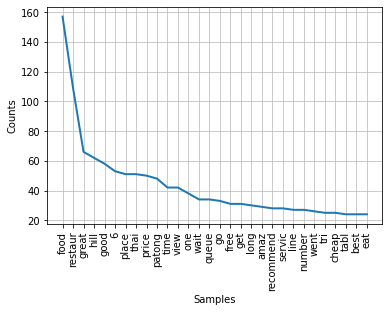

In [ ]:
## Visualizing the positive frequent words

pos_freqDist.plot(30, cumulative = False)
plt.show()

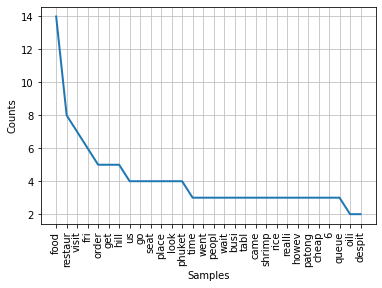

In [ ]:
## Visualizing the negative frequent words

neg_freqDist.plot(30, cumulative = False)
plt.show()

In [ ]:
nltk.pos_tag(pos_token)

[('intrigu', 'NN'),
 ('amount', 'NN'),
 ('peopl', 'JJ'),
 ('front', 'JJ'),
 ('line', 'NN'),
 ('time', 'NN'),
 ('day', 'NN'),
 ('thought', 'VBD'),
 ('give', 'RB'),
 ('go', 'VB'),
 ('food', 'NN'),
 ('fantast', 'NN'),
 ('must', 'MD'),
 ('tri', 'VB'),
 ('bbq', 'NN'),
 ('pork', 'NN'),
 ('neck', 'NN'),
 ('dip', 'NN'),
 ('sauc', 'NN'),
 ('amaz', 'JJ'),
 ('restaur', 'NN'),
 ('town', 'NN'),
 ('pack', 'NN'),
 ('line', 'NN'),
 ('door', 'NN'),
 ('jump', 'NN'),
 ('courtesi', 'NN'),
 ('bu', 'NN'),
 ('went', 'VBD'),
 ('second', 'JJ'),
 ('restaur', 'NN'),
 ('hill', 'NN'),
 ('pack', 'RB'),
 ('great', 'JJ'),
 ('view', 'NN'),
 ('patong', 'IN'),
 ('food', 'NN'),
 ('ok', 'NN'),
 ('noth', 'DT'),
 ('special', 'JJ'),
 ('anoth', 'NN'),
 ('lot', 'NN'),
 ('good', 'JJ'),
 ('review', 'NN'),
 ('place', 'NN'),
 ('made', 'VBD'),
 ('us', 'PRP'),
 ('tri', 'VB'),
 ('second', 'JJ'),
 ('time', 'NN'),
 ('place', 'NN'),
 ('busi', 'NN'),
 ('expect', 'VBP'),
 ('wait', 'NN'),
 ('least', 'JJS'),
 ('10', 'CD'),
 ('15', 'CD'),
 (

In [ ]:
nltk.pos_tag(neg_token)

[('damm', 'NN'),
 ('fri', 'NN'),
 ('prawn', 'NN'),
 ('cake', 'NN'),
 ('made', 'VBD'),
 ('debut', 'JJ'),
 ('heart', 'NN'),
 ('crispi', 'NN'),
 ('overli', 'NN'),
 ('oili', 'NN'),
 ('despit', 'NN'),
 ('fri', 'JJ'),
 ('dish', 'NN'),
 ('must', 'MD'),
 ('order', 'NN'),
 ('regret', 'VB'),
 ('price', 'NN'),
 ('afford', 'NN'),
 ('could', 'MD'),
 ('enjoy', 'VB'),
 ('even', 'RB'),
 ('restaurannt', 'JJ'),
 ('reckless', 'JJ'),
 ('driver', 'NN'),
 ('pick', 'VBP'),
 ('us', 'PRP'),
 ('front', 'JJ'),
 ('no6', 'JJ'),
 ('rhat', 'WP'),
 ('thit', 'VBD'),
 ('rd', 'NN'),
 ('word', 'NN'),
 ('go', 'VB'),
 ('race', 'NN'),
 ('time', 'NN'),
 ('pick', 'JJ'),
 ('next', 'JJ'),
 ('lot', 'NN'),
 ('tourist', 'NN'),
 ('went', 'VBD'),
 ('16', 'CD'),
 ('00', 'CD'),
 ('pack', 'NN'),
 ('solid', 'VBD'),
 ('17', 'CD'),
 ('00', 'CD'),
 ('peopl', 'NN'),
 ('line', 'NN'),
 ('street', 'NN'),
 ('therefor', 'JJ'),
 ('prepar', 'JJ'),
 ('wait', 'NN'),
 ('commun', 'NN'),
 ('seat', 'NN'),
 ('staff', 'NN'),
 ('nice', 'JJ'),
 ('babi', 'NN

<h5>REFERENCES</h5>
<a>https://www.kdnuggets.com/2020/08/natural-language-processing-changing-data-analytics.html</a><br>
<a>https://www.xoriant.com/blog/natural-language-processing-the-next-disruptive-technology-under-ai-part-i</a><br>
<a>https://www.ibm.com/cloud/learn/natural-language-processing#toc-nlp-use-ca-9-lPnWP2</a><br>
<a>https://machinelearningmastery.com/natural-language-processing/</a><br>
<a>https://www.techtarget.com/searchenterpriseai/definition/natural-language-processing-NLP</a>